# Pharma Lab (Advanced Data Transformation)

**Learning Objectives:**
  * Practice advanced data transformation techniques
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to pharma transactions.
### 2. Each transaction is uniquely identified by `TransactionId`.
### 3. Several transactions can take place in a single `TicketNumber`.

## 1. Library Import

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
PharmaDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/PharmaDataSet.csv.zip",sep=',',parse_dates=['Date'])

In [4]:
PharmaDataSet.head(10)

,TransactionId,Date,Pharmacist,ItemId,ItemDescription,TicketNumber,Units,SellingPrice
0,172865,2019-01-01 10:47:41,dc0d3ee6,90,PLASTICO,0,1,0.060
1,172868,2019-01-01 10:47:41,dc0d3ee6,809459,POLARAMINE 2 MG 20 COMPRIMIDOS,0,1,4.008
2,172867,2019-01-01 10:47:41,dc0d3ee6,835454,EBASTEL FORTE FLAS 20 MG 20 LIOFILIZADOS ORALES,0,1,10.548
3,172866,2019-01-01 10:47:41,dc0d3ee6,995233,DACORTIN 30 MG 30 COMPRIMIDOS,0,1,4.512
4,172864,2019-01-01 11:07:21,dc0d3ee6,662042,PARACETAMOL VIATRIS EFG 1 G 40 COMPRIMIDOS,1,1,3.000
5,172862,2019-01-01 11:07:21,dc0d3ee6,656456,ACETILCISTEINA KERN PHARMA EFG 600 MG 20 COMPR...,1,1,4.932
6,172863,2019-01-01 11:07:21,dc0d3ee6,663526,NASONEX 50 MICROGRAMOS/PULVERIZACION SUSPENSIO...,1,1,10.788
7,172861,2019-01-01 11:28:11,dc0d3ee6,662585,"DUROGESIC MATRIX 50 MICROGRAMOS/H (3,6 MG/3 DI...",2,1,35.100
8,172858,2019-01-01 11:32:03,dc0d3ee6,656706,VENTOLIN 100 MICROGRAMOS/INHALACION SUSPENSION...,3,1,3.108
9,172860,2019-01-01 11:32:03,dc0d3ee6,400086,PROCHAMBER CAMARA DE INHALACION,3,1,8.736


In [5]:
PharmaDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759806 entries, 0 to 759805
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TransactionId    759806 non-null  int64         
 1   Date             759806 non-null  datetime64[ns]
 2   Pharmacist       759806 non-null  object        
 3   ItemId           759806 non-null  int64         
 4   ItemDescription  759806 non-null  object        
 5   TicketNumber     759806 non-null  int64         
 6   Units            759806 non-null  int64         
 7   SellingPrice     759806 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 46.4+ MB


In [6]:
## we remove negative Prices

PharmaDataSetClean=PharmaDataSet[PharmaDataSet['SellingPrice']>0]

In [7]:
PharmaDataSetClean

,TransactionId,Date,Pharmacist,ItemId,ItemDescription,TicketNumber,Units,SellingPrice
0,172865,2019-01-01 10:47:41,dc0d3ee6,90,PLASTICO,0,1,0.060
1,172868,2019-01-01 10:47:41,dc0d3ee6,809459,POLARAMINE 2 MG 20 COMPRIMIDOS,0,1,4.008
2,172867,2019-01-01 10:47:41,dc0d3ee6,835454,EBASTEL FORTE FLAS 20 MG 20 LIOFILIZADOS ORALES,0,1,10.548
3,172866,2019-01-01 10:47:41,dc0d3ee6,995233,DACORTIN 30 MG 30 COMPRIMIDOS,0,1,4.512
4,172864,2019-01-01 11:07:21,dc0d3ee6,662042,PARACETAMOL VIATRIS EFG 1 G 40 COMPRIMIDOS,1,1,3.000
...,...,...,...,...,...,...,...,...
759801,1215239,2024-02-09 21:57:45,9709ce9d,695331,ZINNAT 500 MG 10 COMPRIMIDOS RECUBIERTOS,391576,1,11.616
759802,1215238,2024-02-09 21:57:45,9709ce9d,867184,FAMOTIDINA CINFA EFG 40 MG 28 COMPRIMIDOS RECU...,391576,1,6.816
759803,1215234,2024-02-09 22:06:59,50a40157,816728,"RESPIBIEN 0,5 MG/ML SOLUCION PARA PULVERIZACIO...",391577,1,7.380
759804,1215232,2024-02-09 22:06:59,50a40157,676635,ZITROMAX 500 MG 3 COMPRIMIDOS RECUBIERTOS,391577,1,6.744


### 3. Let's produce a table (and visualization) summarising sales per `Pharmacist` accross time

In [17]:
PharmaDataSetClean.groupby(['Pharmacist',pd.Grouper(key='Date',freq='30D')])['SellingPrice'].sum()

Pharmacist  Date      
2530ef17    2024-01-05    20832.012
            2024-02-04     4394.712
4a165283    2019-10-28    13624.872
            2019-11-27    28109.880
            2019-12-27    29216.712
                            ...    
eec61f75    2023-10-07    34682.328
            2023-11-06    17462.004
            2023-12-06    34248.444
            2024-01-05    24213.828
            2024-02-04      740.232
Name: SellingPrice, Length: 466, dtype: float64

In [18]:
PharmaDataSetCleanGrouped=PharmaDataSetClean.groupby(['Pharmacist',pd.Grouper(key='Date',freq='30D')])['SellingPrice'].sum().reset_index()
PharmaDataSetCleanGrouped

,Pharmacist,Date,SellingPrice
0,2530ef17,2024-01-05,20832.012
1,2530ef17,2024-02-04,4394.712
2,4a165283,2019-10-28,13624.872
3,4a165283,2019-11-27,28109.880
4,4a165283,2019-12-27,29216.712
...,...,...,...
461,eec61f75,2023-10-07,34682.328
462,eec61f75,2023-11-06,17462.004
463,eec61f75,2023-12-06,34248.444
464,eec61f75,2024-01-05,24213.828


In [21]:
PharmaDataSetCleanGrouped.pivot(index='Date',columns='Pharmacist',values='SellingPrice')

Pharmacist,2530ef17,4a165283,50a40157,647fcb0b,6eb26447,75703f37,7d9fa925,88136f2e,9709ce9d,9b902958,9ba2676a,9e6cd9ac,dc0d3ee6,eec61f75
Date,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,16232.244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9760.116,76895.688
2019-01-31,NaN,NaN,6205.248,16379.532,NaN,NaN,72.432,NaN,NaN,NaN,54.072,53.256,22641.360,66493.728
2019-03-02,NaN,NaN,4748.028,26310.828,NaN,NaN,455.532,NaN,NaN,NaN,1070.628,43.956,35851.416,44444.040
2019-04-01,NaN,NaN,17421.936,17281.044,NaN,NaN,100.260,NaN,NaN,NaN,28901.388,NaN,17640.756,49504.752
2019-05-01,NaN,NaN,18970.764,16523.808,NaN,NaN,135.444,NaN,NaN,NaN,25514.244,21.852,11347.212,47677.440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-07,NaN,23577.300,33854.568,NaN,32345.808,NaN,16.140,37210.272,29193.252,NaN,36437.928,17.964,18501.204,34682.328
2023-11-06,NaN,42420.228,33071.316,NaN,26209.260,NaN,NaN,32041.824,18473.160,NaN,50019.180,NaN,20656.632,17462.004
2023-12-06,NaN,38146.692,42013.764,NaN,48208.476,NaN,NaN,50825.460,33058.344,NaN,35332.752,10.584,18084.672,34248.444


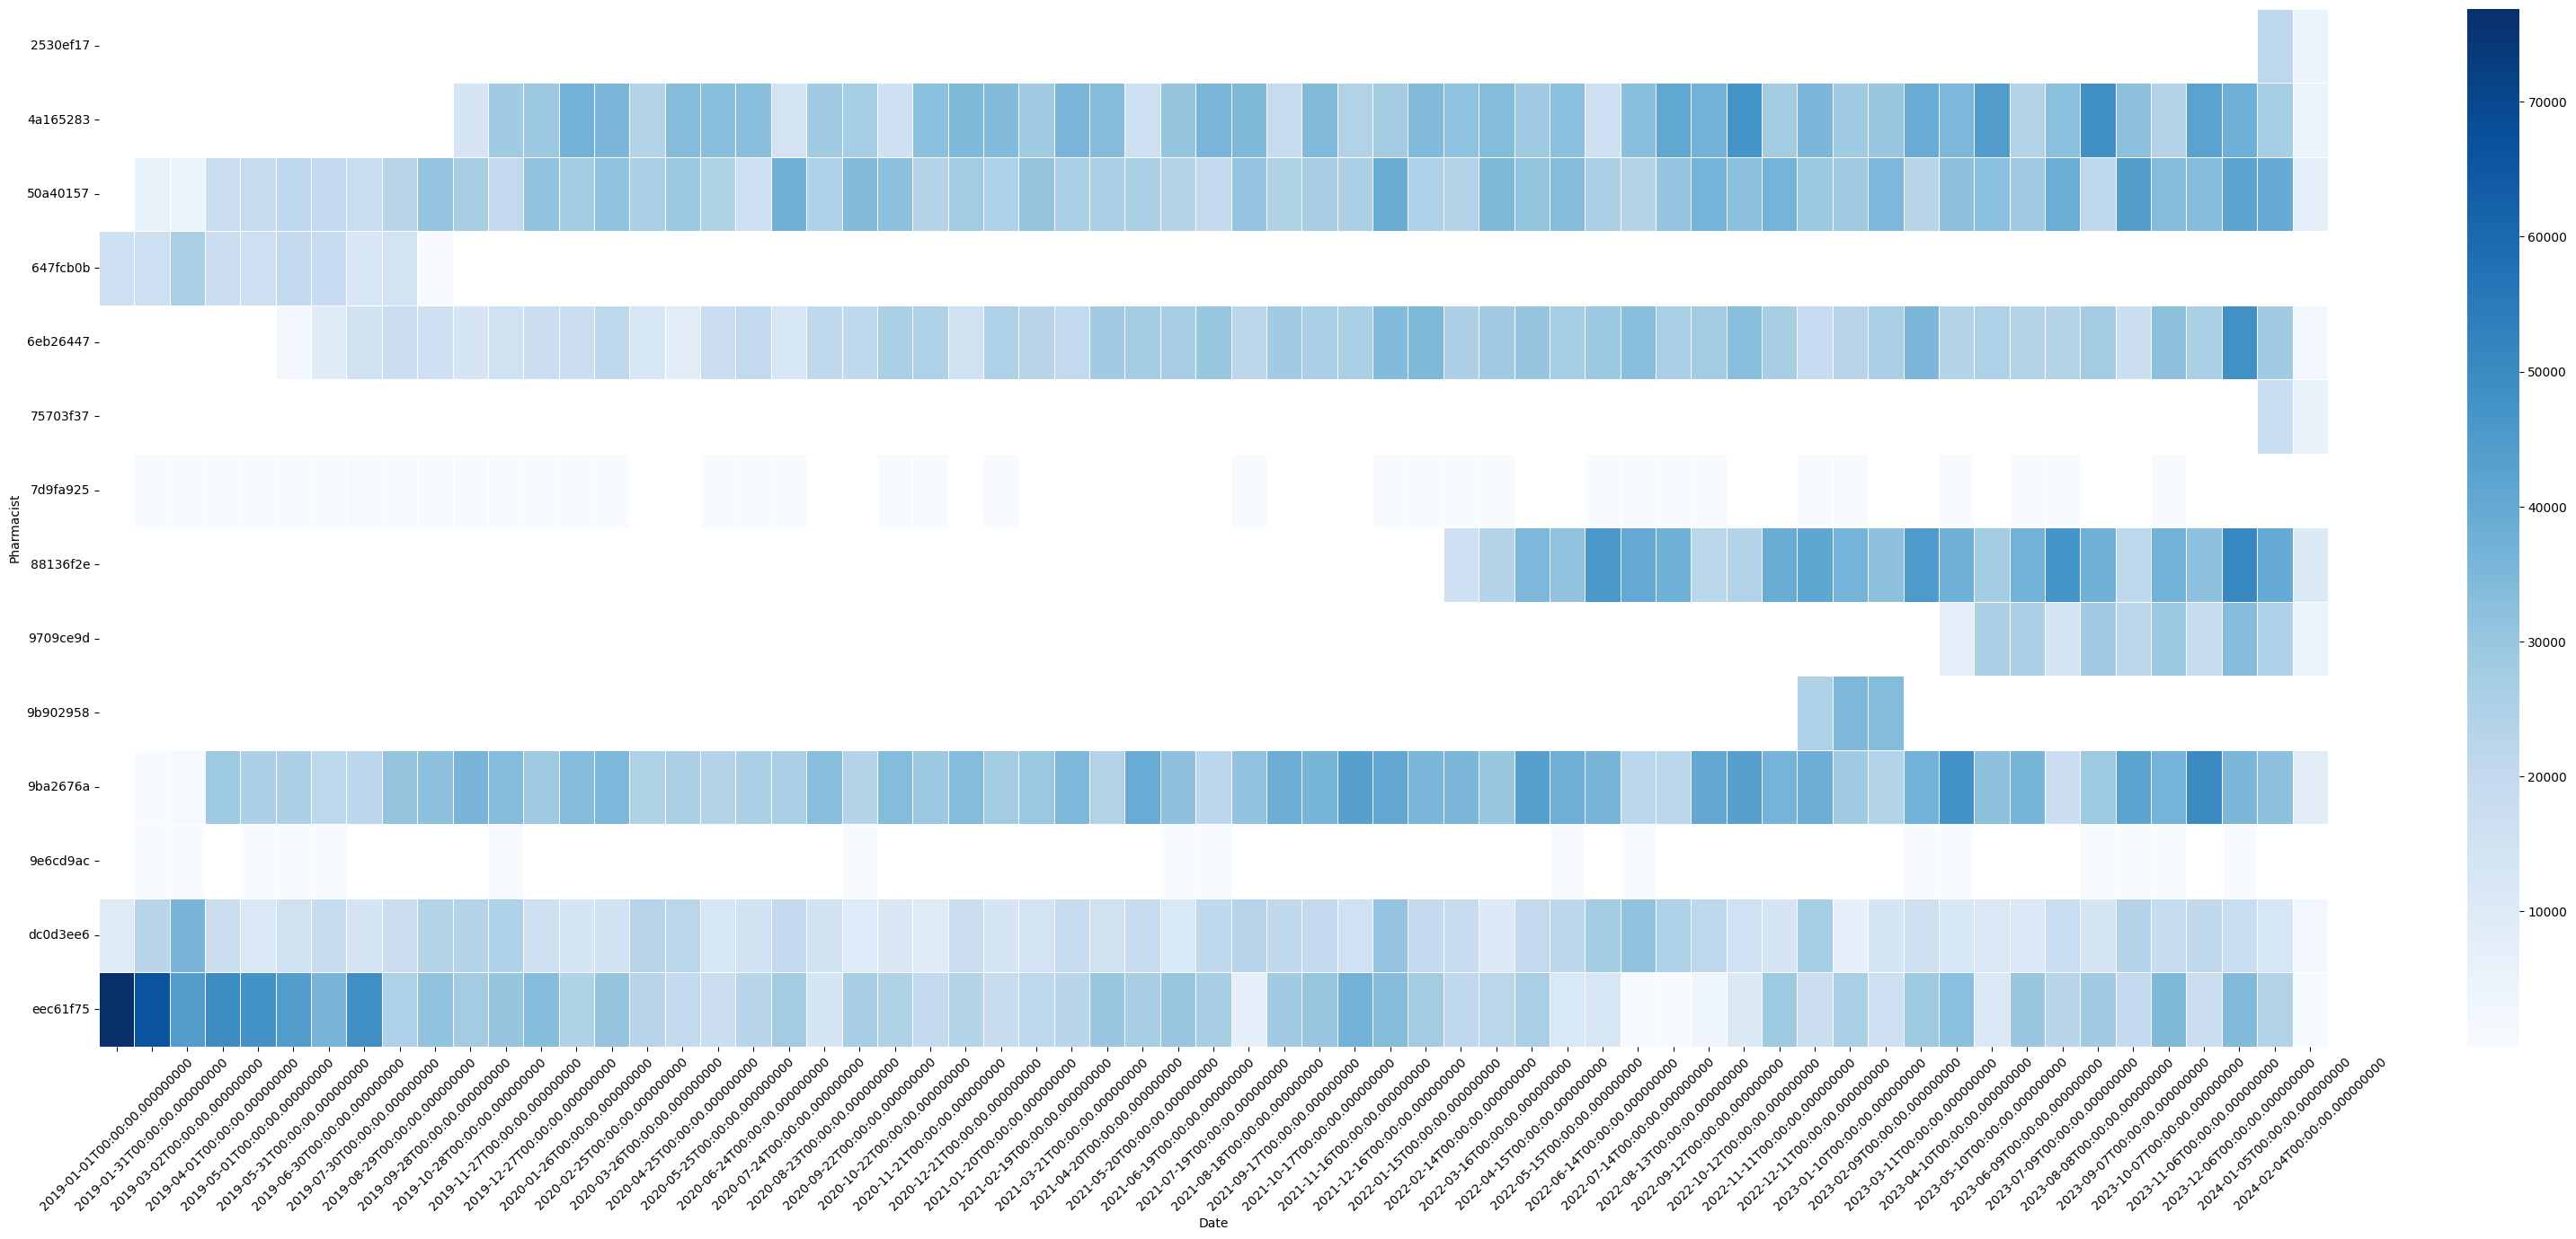

In [36]:
fig, ax = plt.subplots(figsize=(40, 15))

sns.heatmap(PharmaDataSetCleanGrouped.pivot(index='Date',columns='Pharmacist',values='SellingPrice').T, annot=False,  linewidths=.5 ,cmap='Blues', fmt='g')
plt.xticks(rotation=45);
plt.yticks(rotation=0);